# Worksheet 07

Name:  Jialu Li
UID: U15245968

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

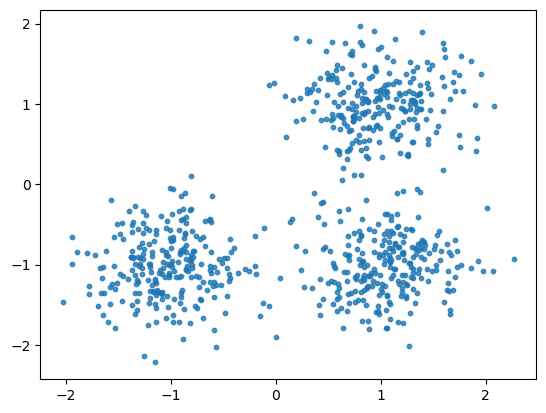

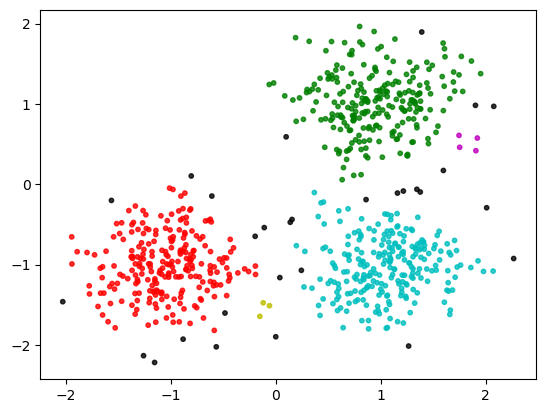

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.neighbors import NearestNeighbors

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                           random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.show()


class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        self.NOISE = -1
        self.UNASSIGNED = 0
        self.cluster = 1

    def _neighbor_points(self, point_idx):
        neighbors = []
        for i in range(len(self.dataset)):
            if np.linalg.norm(self.dataset[point_idx] - self.dataset[i]) <= self.epsilon:
                neighbors.append(i)
        return neighbors

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        labels = [self.UNASSIGNED] * len(self.dataset)
        
        for idx in range(len(self.dataset)):
            if labels[idx] != self.UNASSIGNED:
                continue

            neighbors = self._neighbor_points(idx)
            
            if len(neighbors) < self.min_pts:
                labels[idx] = self.NOISE
                continue

            labels[idx] = self.cluster
            i = 0
            while i < len(neighbors):  
                nbr = neighbors[i]
                
                if labels[nbr] == self.NOISE:
                    labels[nbr] = self.cluster
                elif labels[nbr] == self.UNASSIGNED:
                    labels[nbr] = self.cluster
                    new_neighbors = self._neighbor_points(nbr)
                    if len(new_neighbors) >= self.min_pts:
                        neighbors = neighbors + new_neighbors
                i += 1

            self.cluster += 1

        return labels


clustering = DBC(X, 3, 0.2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()